# Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) es una etapa crucial en cualquier proyecto de análisis de datos o machine learning. Proporciona una comprensión inicial de los datos y ayuda a identificar patrones, tendencias y posibles problemas que puedan surgir durante el análisis.

## Objetivo

El objetivo de este documento es documentar el proceso de Análisis Exploratorio de Datos (EDA) realizado en el conjunto de datos XYZ.


0. **Cargar las librerías a utilzar**: Se importarán todas las dependencias a utilizar en este jupyter noteboook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../src')

from features import features

1. **Cargar los datos**: Leer el conjunto de datos en un entorno de programación como Python utilizando bibliotecas como pandas.

In [2]:
PATH_TO_DATA = '../data/raw_data/HeartDisease_train.csv'
CATEREGOCAL_FEATURES = features.CATEREGOCAL_FEATURES
CONTINUOUS_FEATURES = features.CONTINUOUS_FEATURES
TARGET = features.TARGET
df_heart_disease = pd.read_csv(PATH_TO_DATA)

2. **Exploración inicial**:
   - Mostrar las primeras filas del conjunto de datos.
   - Revisar la estructura de los datos (número de filas y columnas).
   - Verificar los tipos de datos de cada columna.
   - Identificar la presencia de valores nulos o faltantes.

In [3]:
df_heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
1,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
2,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
4,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0


In [4]:
print('El data set tiene {} columnas'.format(len(df_heart_disease.columns)))
print('El data set tiene {} registros'.format(len(df_heart_disease)))

El data set tiene 14 columnas
El data set tiene 686 registros


In [5]:
df_heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       686 non-null    int64  
 1   sex       686 non-null    int64  
 2   cp        686 non-null    int64  
 3   trestbps  686 non-null    int64  
 4   chol      686 non-null    int64  
 5   fbs       686 non-null    int64  
 6   restecg   686 non-null    int64  
 7   thalach   686 non-null    int64  
 8   exang     686 non-null    int64  
 9   oldpeak   686 non-null    float64
 10  slope     686 non-null    int64  
 11  ca        686 non-null    int64  
 12  thal      686 non-null    int64  
 13  target    686 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 75.2 KB


In [7]:
df_heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

3. **Estadísticas descriptivas -Análisis univariado-**:
   - Calcular estadísticas descriptivas como la media, la mediana, la desviación estándar, etc.
   - Visualizar la distribución de las variables numéricas mediante histogramas, boxplots, etc.
   - Analizar la distribución de las variables categóricas utilizando gráficos de barras u otros métodos adecuados.

3.1 **Features Continuas**:
   - Calcular estadísticas descriptivas como la media, la mediana, la desviación estándar, etc.
   - Visualizar la distribución de las variables numéricas mediante histogramas, boxplots y matriz de correlacion.

In [8]:
df_heart_disease[CONTINUOUS_FEATURES].describe()

,age,trestbps,chol,thalach,oldpeak
count,686.000000,686.000000,686.000000,686.000000,686.000000
mean,54.220117,131.024781,244.897959,149.180758,1.095190
std,8.957463,17.290332,51.329149,22.637208,1.177796
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.000000,120.000000,211.000000,132.000000,0.000000
50%,55.000000,130.000000,239.000000,152.000000,0.800000
75%,61.000000,140.000000,275.750000,165.750000,1.800000
max,77.000000,200.000000,564.000000,202.000000,6.200000


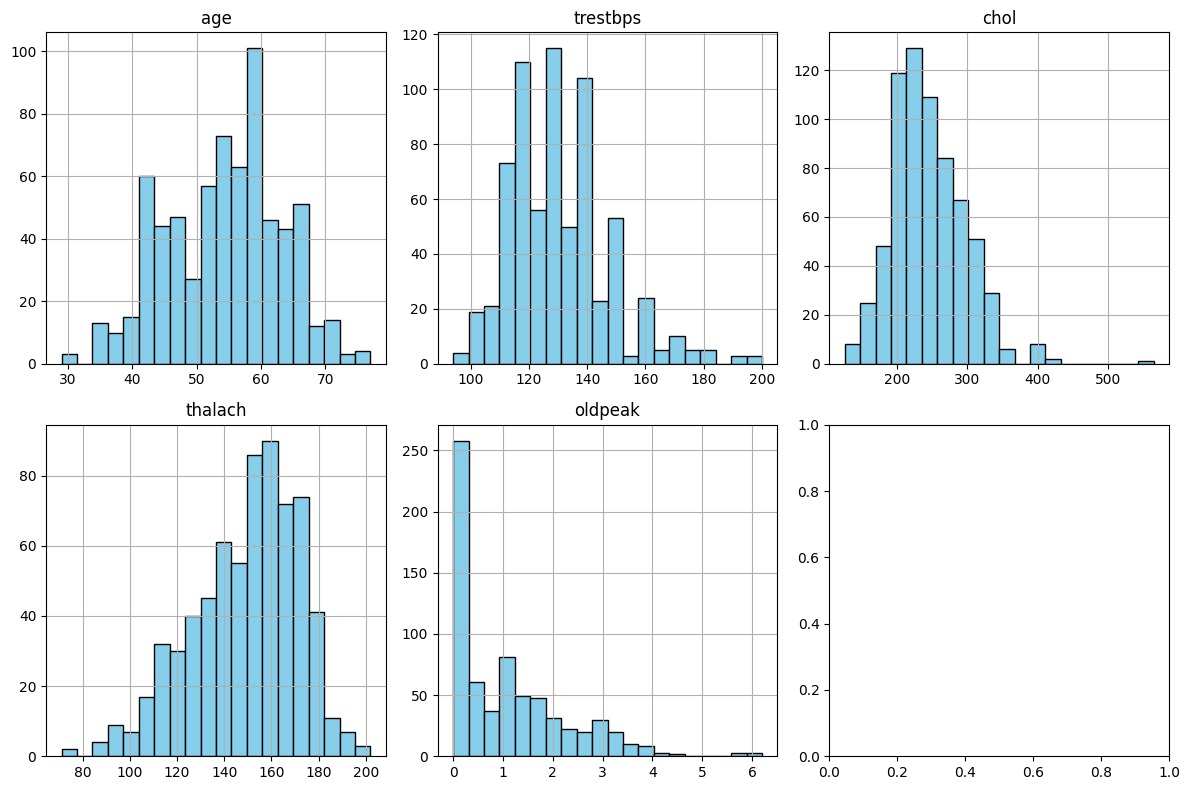

In [9]:
features = df_heart_disease[CONTINUOUS_FEATURES].columns.tolist()

num_features = len(features)
num_rows = num_features // 3 + (num_features % 3 > 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 8))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    if not df_heart_disease[feature].isnull().all():
        df_heart_disease[feature].hist(ax=ax, bins=20, color='skyblue', edgecolor='black')
        ax.set_title(feature)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

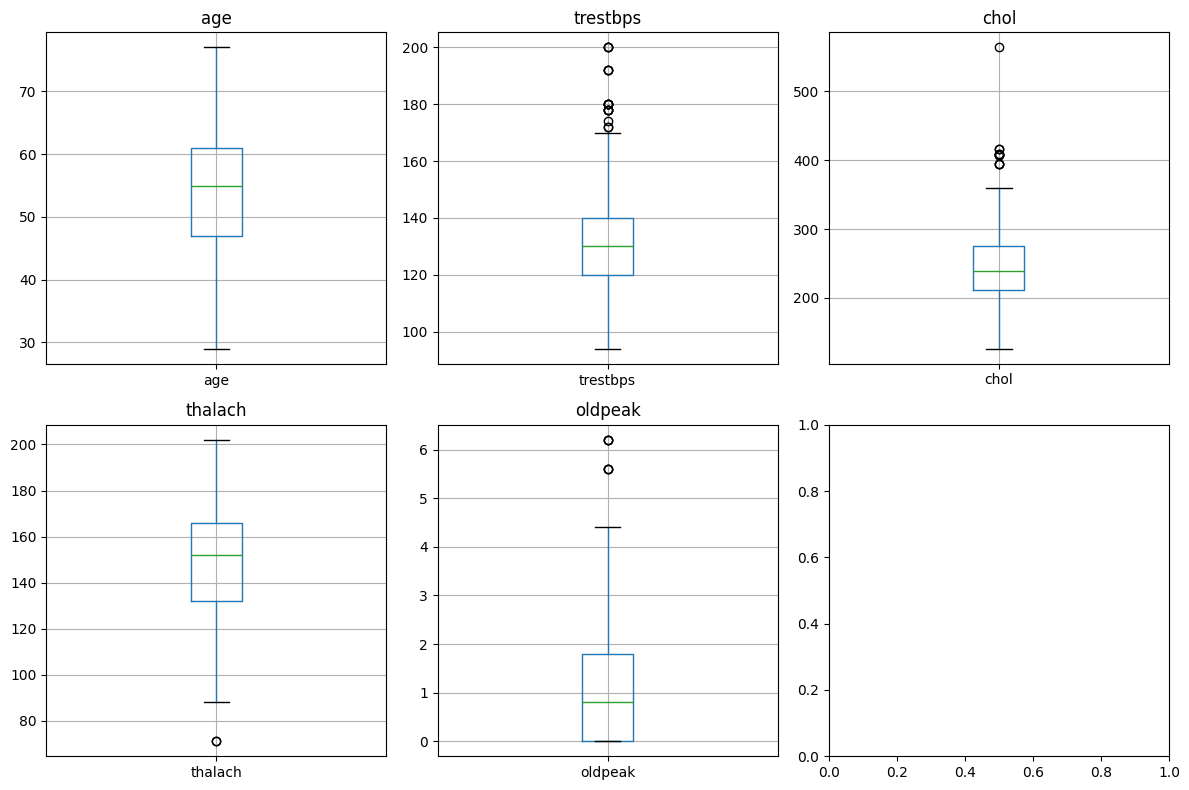

In [10]:
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 8))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    if not df_heart_disease[feature].isnull().all():
        df_heart_disease.boxplot(column=feature, ax=ax)
        ax.set_title(feature)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


3.2 **Features Categoricas**:
   - Analizar la distribución de las variables categóricas utilizando gráficos de barras.

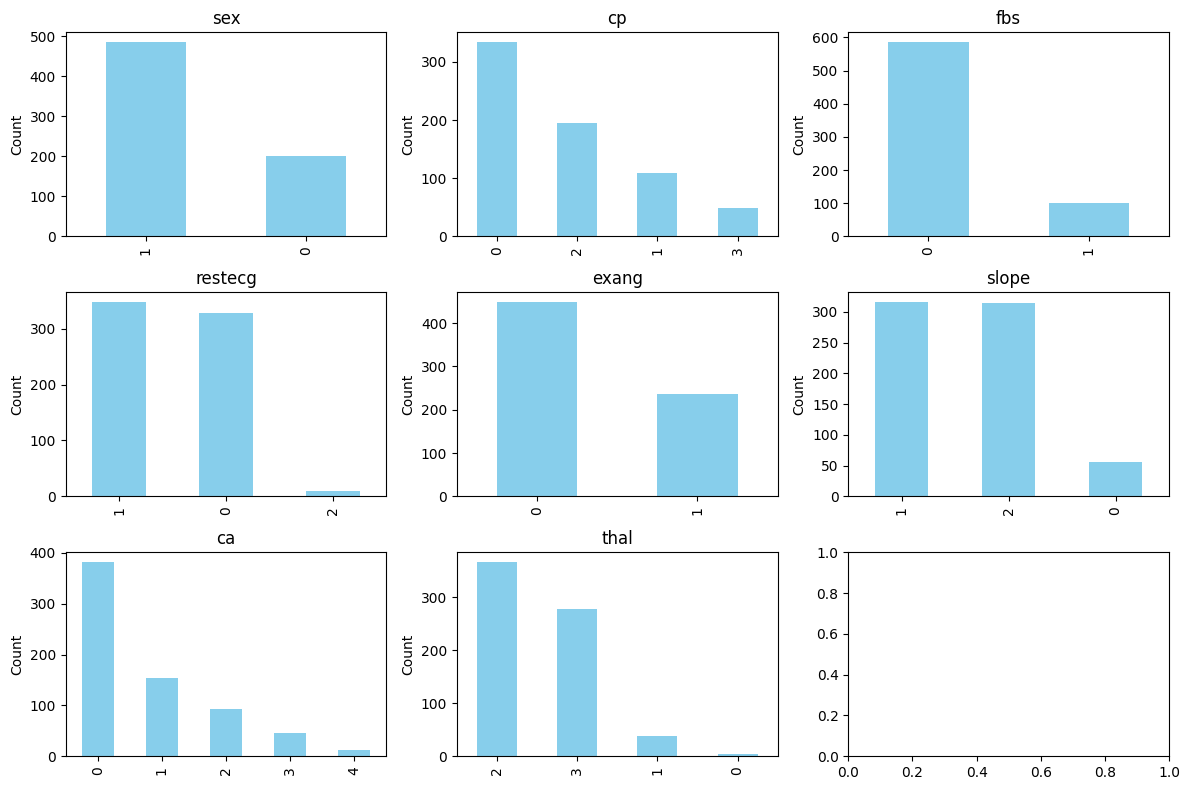

In [11]:
categorical_features = df_heart_disease[CATEREGOCAL_FEATURES].columns

# Crear subplots
num_features = len(categorical_features)
num_rows = num_features // 3 + (num_features % 3 > 0)  # Redondeo hacia arriba
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 8))

# Iterar sobre las características y los ejes de la matriz
for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Calcular el recuento de valores únicos para la característica actual
    value_counts = df_heart_disease[feature].value_counts()
    
    # Crear gráfico de barras para la característica actual
    value_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(feature)  # Establecer el título como el nombre de la característica
    ax.set_ylabel('Count')  # Etiqueta del eje y

# Ajustar la disposición
plt.tight_layout()
plt.show()


4. **Exploración de relaciones entre variables -Análisis bivariado**:
   - Calcular correlaciones entre variables numéricas.
   - Visualizar relaciones entre variables utilizando gráficos de dispersión, matrices de dispersión, etc.
   - Explorar la relación entre variables categóricas utilizando tablas de contingencia o gráficos adecuados.

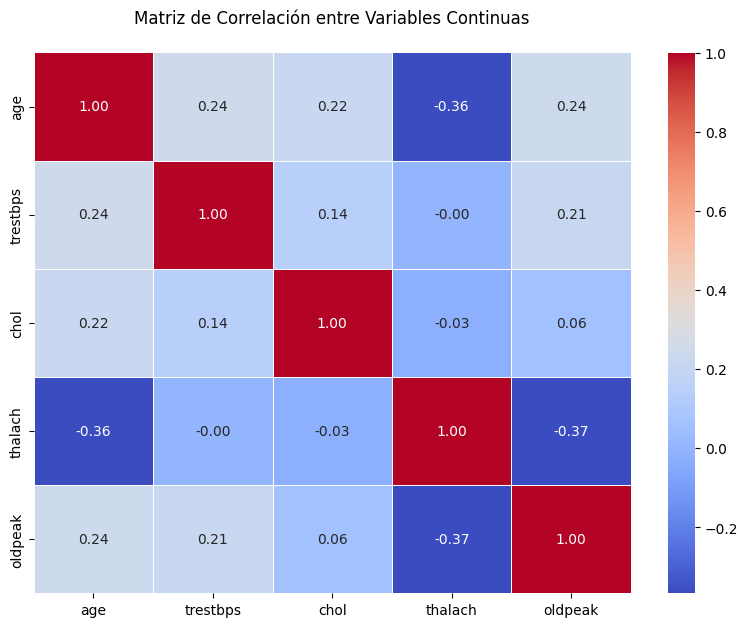

In [12]:
continuous_features = df_heart_disease[CONTINUOUS_FEATURES].columns

# Calcular la matriz de correlación
correlation_matrix = df_heart_disease[continuous_features].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Visualizar la matriz de correlación usando un mapa de calor (heatmap)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Ajustar la disposición
plt.tight_layout()
plt.title('Matriz de Correlación entre Variables Continuas\n')
plt.show()

## Conclusiones

1. **Distribución de la Edad:** La edad de los pacientes varía entre 29 y 77 años, con una media de aproximadamente 54 años. Esto sugiere que la mayoría de los pacientes son de mediana edad o mayores, lo cual es relevante considerando el riesgo de enfermedades cardíacas aumenta con la edad.

2. **Distribución de Género:** Aproximadamente el 70.8% de los pacientes son hombres. Este desequilibrio sugiere que los datos pueden estar más representados por pacientes masculinos, lo cual es importante al generalizar los hallazgos a una población más amplia.

3. **Variables y Enfermedad Cardíaca (Target):** La variable target está significativamente correlacionada con varias características incluyendo cp (tipo de dolor torácico, correlación de 0.465), thalach (frecuencia cardíaca máxima alcanzada, correlación de 0.420), y slope (la pendiente del segmento ST de ejercicio pico, correlación de 0.323). Esto indica que estos factores están fuertemente relacionados con la presencia de enfermedad cardíaca.

4. **Relación entre oldpeak y Enfermedad Cardíaca:** Hay una fuerte correlación negativa (-0.431) entre oldpeak (depresión del ST inducida por el ejercicio en relación con el reposo) y la variable target. Esto sugiere que valores más bajos de oldpeak están asociados con una mayor probabilidad de enfermedad cardíaca.

5. **Presencia de Angina Inducida por Ejercicio:** La variable exang (angina inducida por ejercicio) tiene una correlación negativa significativa (-0.421) con la presencia de enfermedad cardíaca. Esto implica que los pacientes que no experimentan angina inducida por ejercicio tienen una mayor probabilidad de tener enfermedad cardíaca.

6. **Talasemia (thal) y Enfermedad Cardíaca:** Existe una correlación negativa (-0.359) entre la talasemia (thal) y la presencia de enfermedad cardíaca. Esto podría sugerir que ciertos tipos de talasemia están asociados con un menor riesgo de enfermedad cardíaca, aunque esta interpretación requiere una comprensión más profunda de la naturaleza categórica de thal.

7. **Número de Vasos Principales Coloreados (ca) y Enfermedad Cardíaca:** La variable ca muestra una correlación negativa (-0.381) con la variable target, indicando que un mayor número de vasos sanguíneos principales coloreados por fluoroscopia está asociado con un menor riesgo de enfermedad cardíaca.